# Multiple Linear Regression

## Bike Sharing Assignment

#### Problem Statement:
A US bike-sharing provider, BoomBikes, has recently suffered considerable dips in their revenues. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue to a healthy state.

BoomBikes aspires to understand the demand for shared bikes among the people. They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- **Which variables are significant in predicting the demand for shared bikes.**
- **How well those variables describe the bike demands.**

The solution approach is divided into the following sections:
- **Reading and Understanding the Data**

- **Perform Data Quality Check**
  - Check for NULL/MISSING values
  - Check for Duplicate values
  - Handle outliers
  - Removing redundant columns

- **Data Preparation from Data Dictionary Mapping**

- **EDA: Visualizing the Data**
  - Univariate Analysis
  - Bivariate Analysis: Categorical Columns
  - Bivariate Analysis: Numerical Columns

- **Dummy Variables: Data Preparation for Model**

- **Model Building and Evaluation**
  - Splitting the Data
  - Scaling

- **Building a Model Using RFE and Automated Approach**
  - Use RFE to Eliminate Some Columns
  - Manual Elimination of Columns

- **Build Models**

- **Model Evaluation**
  - Residual Analysis
  - Linearity Check
  - Predict Values for Test Data Set
  - R-squared Value for Test Predictions
  - Homoscedasticity
  - Plot Test vs Predicted Test Values

- **Making Predictions**
  - Interpreting the Model
  - Summary of Key Inferences

### Step 1: Reading and Understanding the Data

In [470]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [471]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

In [472]:
# Read the data from csv file

df = pd.read_csv('day.csv')

In [473]:
# Check the head of the dataset
 
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [474]:
# checking the shape of dataframe

df.shape

(730, 16)

In [475]:
# describing the columns of dataframe

df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [476]:
# get the info about columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [477]:
df.size

11680


#### Observation:  

<ul ><li>Dataset has 730 rows and 16 columns.</li>
<li>Except one column, all others are either float or integer type.</li>
<li>One column is of date type.</li>
<li>Looking at the data, there seem to be some fields that are categorical in nature but are currently in integer/float type.</li>
We will analyze and finalize whether to convert them to categorical or treat them as integer.
    


### Step 2 : Perform Data Quality Check

#### Check for NULL/MISSING values

In [478]:
# checking for the null values in column data

df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [479]:
# percentage of missing values in each column
round(100*(df.isnull().sum()/len(df)), 2).sort_values(ascending=False)

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

#### Check for Duplicate values

In [480]:
df_dup = df.copy()

# Checking for duplicates and dropping the entire duplicate row if any
df_dup.drop_duplicates(subset=None, inplace=True)
df_dup.shape

(730, 16)

#### Observation
 - No duplicate found as shape is same as before

#### Handle outliers

In [481]:
#Print number of unique values in all columns
df.nunique()

instant       730
dteday        730
season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
casual        605
registered    678
cnt           695
dtype: int64

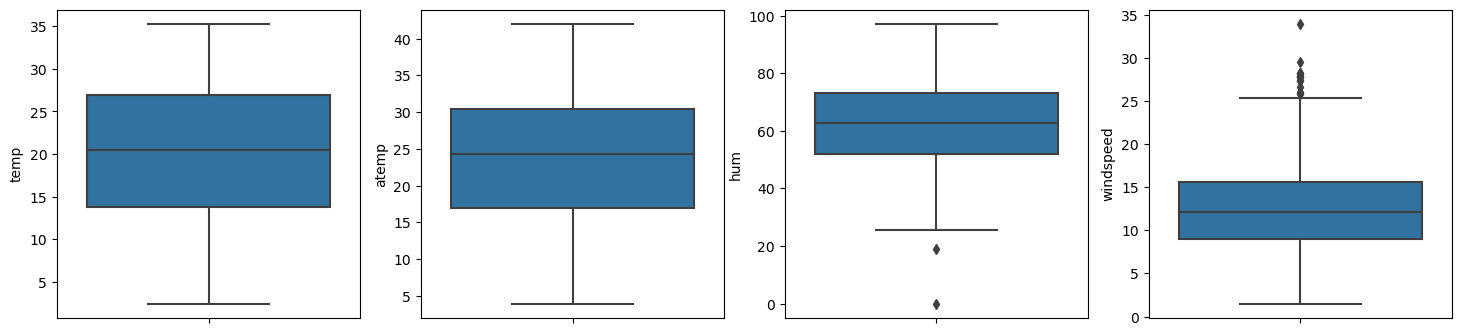

In [482]:
# Draw box plots for indepent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=df)
    i+=1

#### Observation
- There are no outliers to be handled. 

#### Removing redundant columns

In [483]:
# dropping the redundant columns
# instant has only index for the row, dteday has date which can be compensated by year and month column,
# casual and registered seems to be the breakup by category for cnt column.
# So we can drop these columns

df.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)
df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [484]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


### Step 3 : Data Preparation from Data Dictionary mapping

In [485]:
# Encoding/mapping the season column to categorical values

df.season = df.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})


In [486]:
df['season'].astype('category').value_counts()

season
fall      188
summer    184
spring    180
winter    178
Name: count, dtype: int64

In [487]:
# Encoding/mapping the month column

df.mnth = df.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

In [488]:
df['mnth'].astype('category').value_counts()

mnth
aug     62
dec     62
jan     62
july    62
mar     62
may     62
oct     62
apr     60
june    60
nov     60
sep     60
feb     56
Name: count, dtype: int64

In [489]:
# Encoding/mapping the weekday column

df.weekday = df.weekday.map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [490]:
df['weekday'].astype('category').value_counts()

weekday
mon    105
sat    105
sun    105
fri    104
thu    104
tue    104
wed    103
Name: count, dtype: int64

In [491]:
# Encoding/mapping the weathersit column

df.weathersit = df.weathersit.map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})


In [492]:
df['weathersit'].astype('category').value_counts()

weathersit
Clear             463
Misty             246
Light_snowrain     21
Name: count, dtype: int64

In [493]:
# check the head of the dataset

df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [494]:
# check the column info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Step 4: Visualising the Data

#### Univariate Analysis

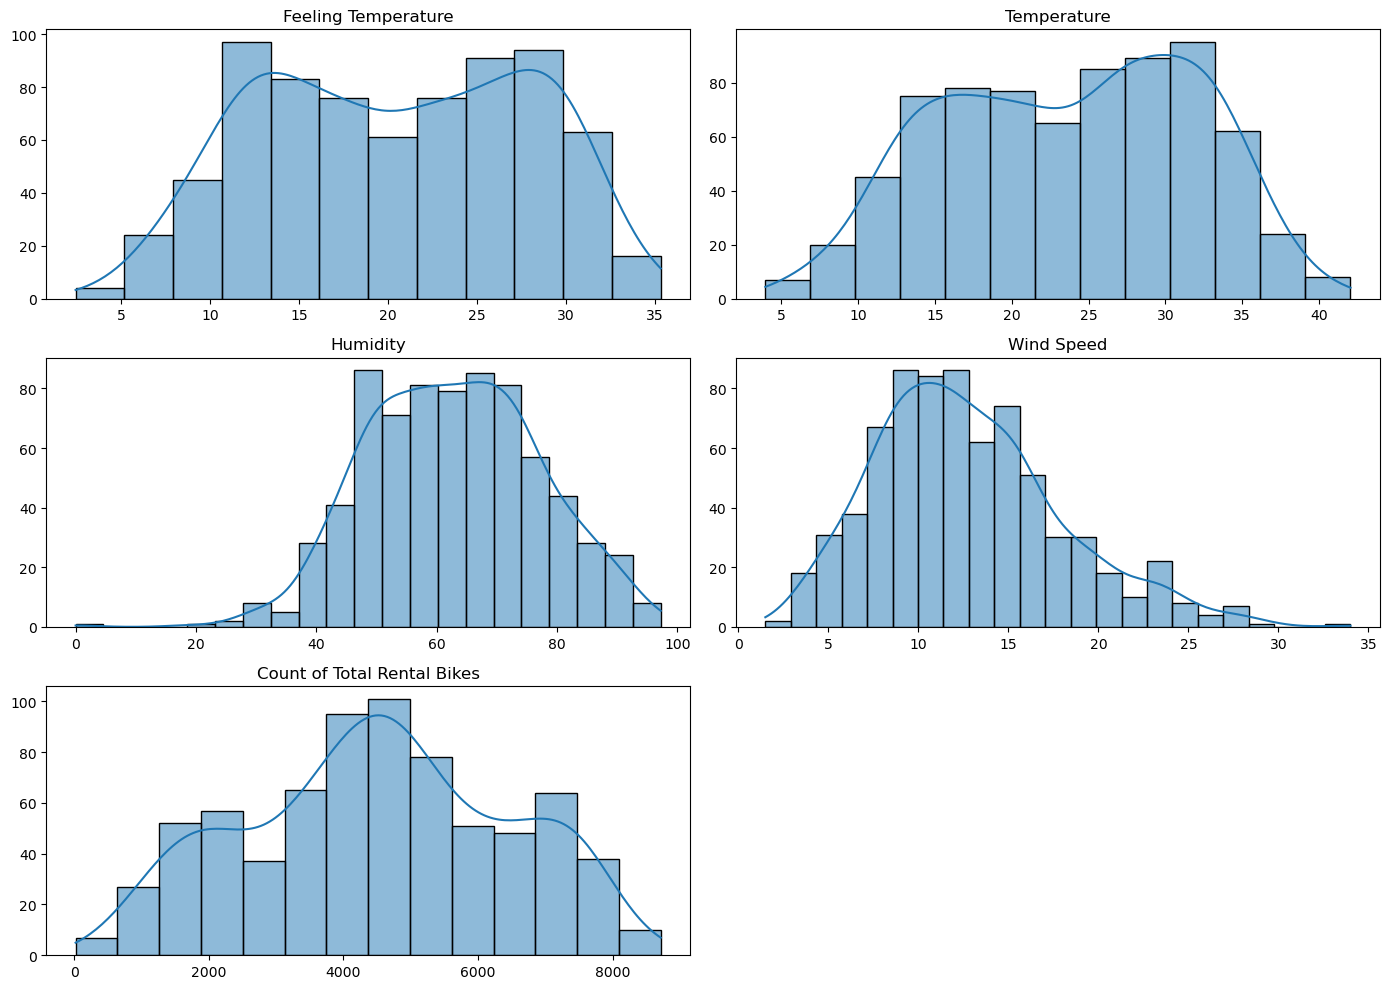

In [495]:
# List of columns to plot
columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
titles = ['Feeling Temperature', 'Temperature', 'Humidity', 'Wind Speed', 'Count of Total Rental Bikes']

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
axes = axes.flatten()  # Flatten the 2D array of axes to make it easy to iterate

# Plot each distribution
for ax, column, title in zip(axes, columns, titles):
    sns.histplot(df[column], kde=True, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_ylabel('')

# Remove empty subplots if any
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and show plot
plt.tight_layout()
plt.show()

#### Bivariate Analysis : Categorical columns 

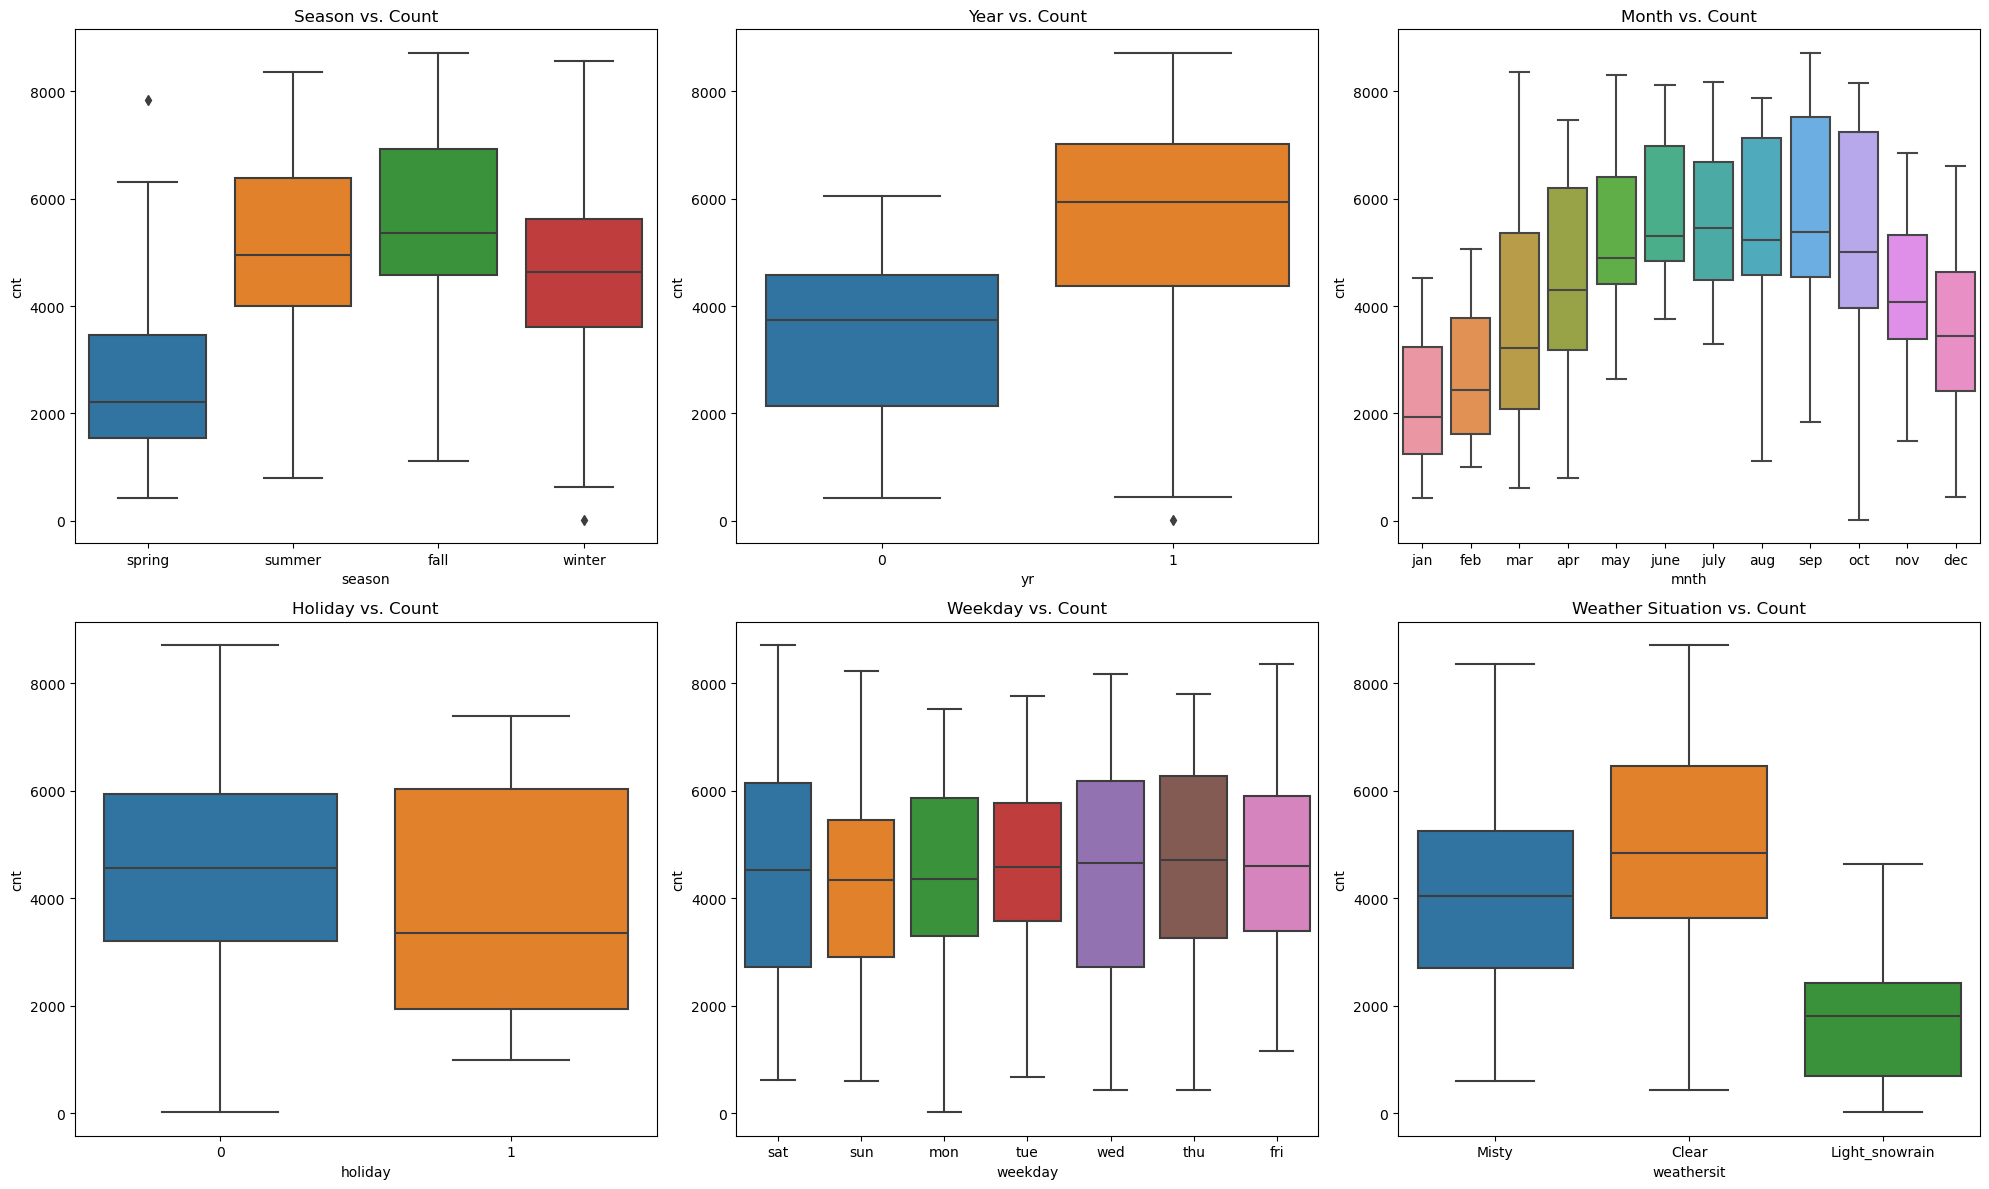

In [496]:
# Analysing/visualizing the categorical columns
# to see how predictor variable stands against the target variable

plt.figure(figsize=(20, 12))

# Plot 1: season vs. cnt
plt.subplot(2, 3, 1)
sns.boxplot(x='season', y='cnt', data=df)
plt.title('Season vs. Count')

# Plot 2: yr vs. cnt
plt.subplot(2, 3, 2)
sns.boxplot(x='yr', y='cnt', data=df)
plt.title('Year vs. Count')

# Plot 3: mnth vs. cnt
plt.subplot(2, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=df)
plt.title('Month vs. Count')

# Plot 4: holiday vs. cnt
plt.subplot(2, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=df)
plt.title('Holiday vs. Count')

# Plot 5: weekday vs. cnt
plt.subplot(2, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=df)
plt.title('Weekday vs. Count')

# Plot 6: weathersit vs. cnt
plt.subplot(2, 3, 6)
sns.boxplot(x='weathersit', y='cnt', data=df)
plt.title('Weather Situation vs. Count')

# Adjust layout
plt.tight_layout()
plt.show()


**Observations**

There are 6 categorical variables in the dataset.

We used a Box plot (refer to the figure above) to study their effect on the dependent variable (‘cnt’).

**The inferences that we could derive were:**

- **season:** Almost 32% of the bike bookings were happening in season 3 with a median of over 5000 bookings (for the period of 2 years). This was followed by season 2 & season 4 with 27% & 25% of total bookings. This indicates that season can be a good predictor for the dependent variable.

- **mnth:** Almost 10% of the bike bookings were happening in months 5, 6, 7, 8 & 9 with a median of over 4000 bookings per month. This indicates that the month has some trend for bookings and can be a good predictor for the dependent variable.

- **weathersit:** Almost 67% of the bike bookings were happening during ‘Clear’ with a median of close to 5000 bookings (for the period of 2 years). This was followed by Misty with 30% of total bookings. This indicates that weathersit shows some trend towards the bike bookings and can be a good predictor for the dependent variable.

- **holiday:** Almost 97.6% of the bike bookings were happening when it is not a holiday, which means this data is clearly biased. This indicates that holiday CANNOT be a good predictor for the dependent variable.

- **weekday:** The weekday variable shows a very close trend (between 13.5%-14.8% of total bookings on all days of the week) having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence on the predictor. I will let the model decide if this needs to be added or not.

- **workingday:** Almost 69% of the bike bookings were happening on ‘working days’ with a median of close to 5000 bookings (for the period of 2 years). This indicates that working day can be a good predictor for the dependent variable

#### Bivariate Analysis : Numerical columns 

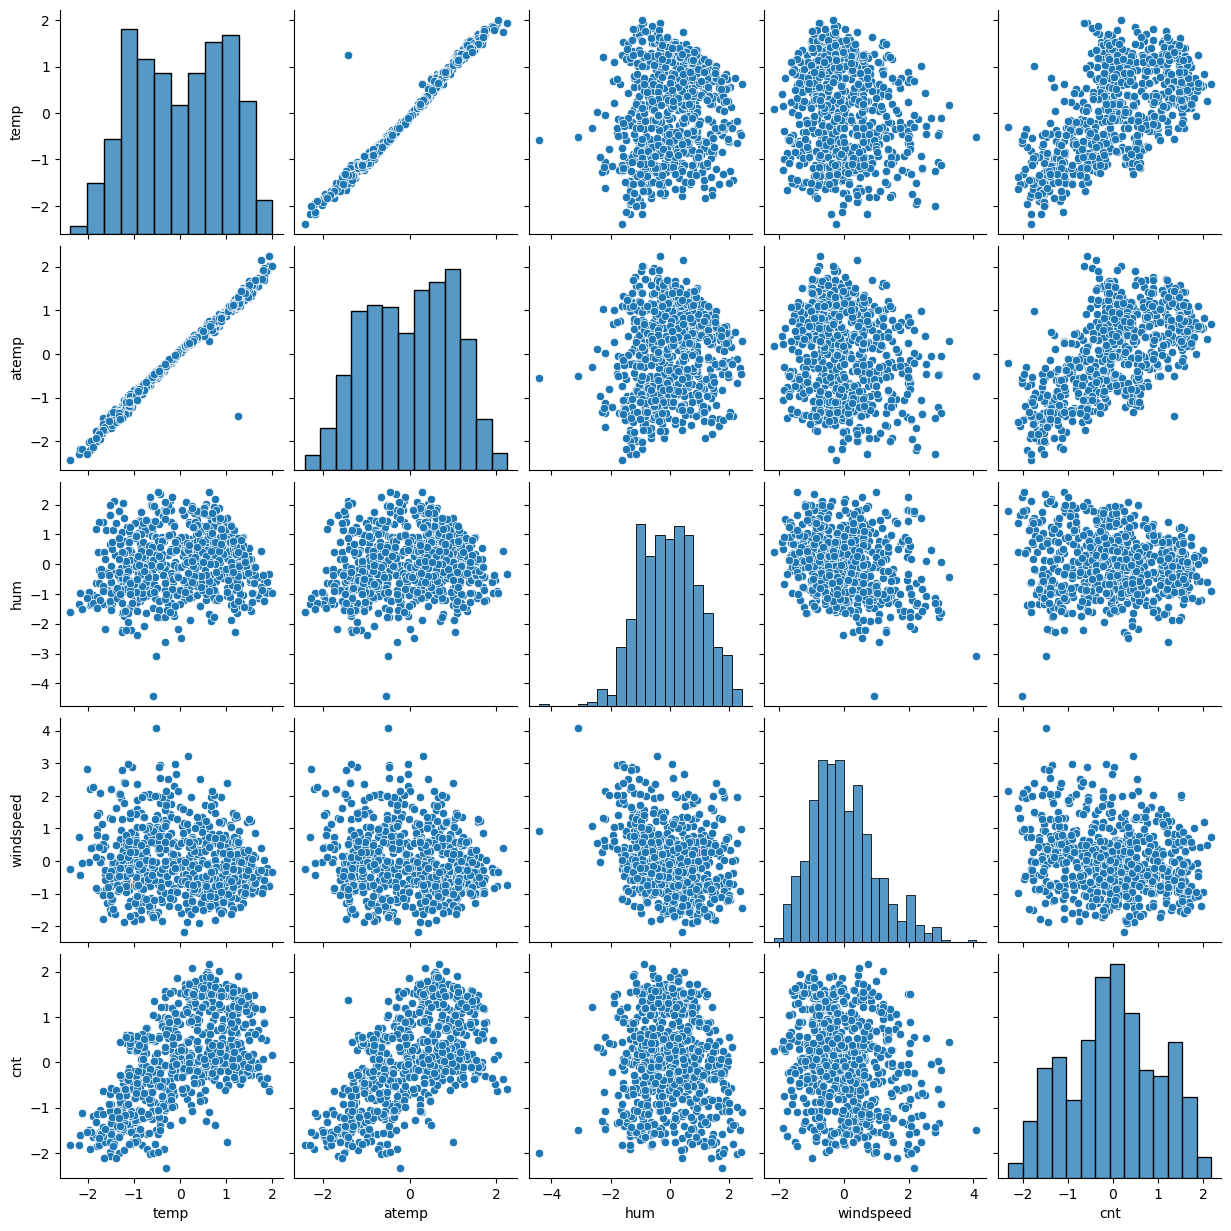

In [497]:
from sklearn.preprocessing import StandardScaler
# Select only the numerical columns of interest
numerical_columns = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']

scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])
sns.pairplot(df[numerical_columns])
plt.show()

#### Observation:
- The above Pair-Plot tells us that there is a LINEAR RELATION between 'temp','atemp' and 'cnt'

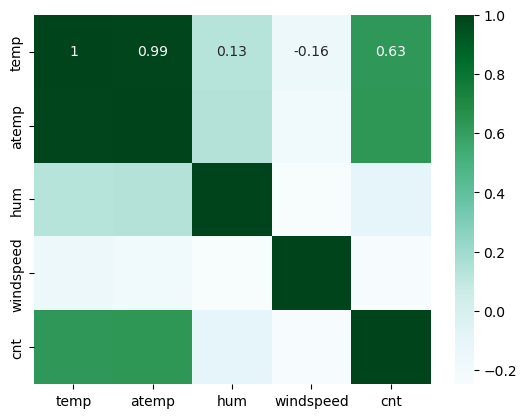

In [498]:
# Checking continuous variables relationship with each other
sns.heatmap(df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

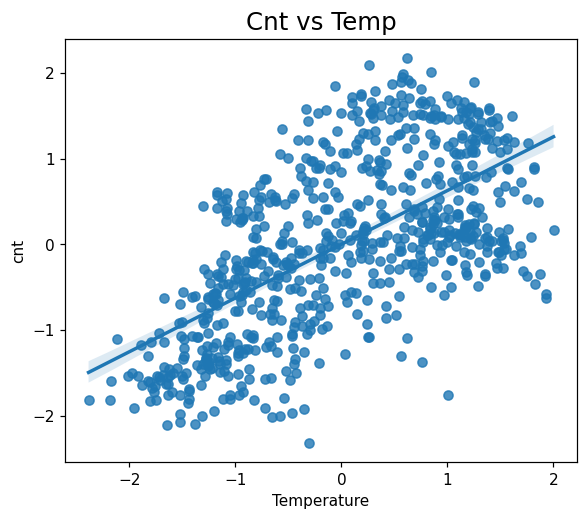

In [499]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### Observation
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

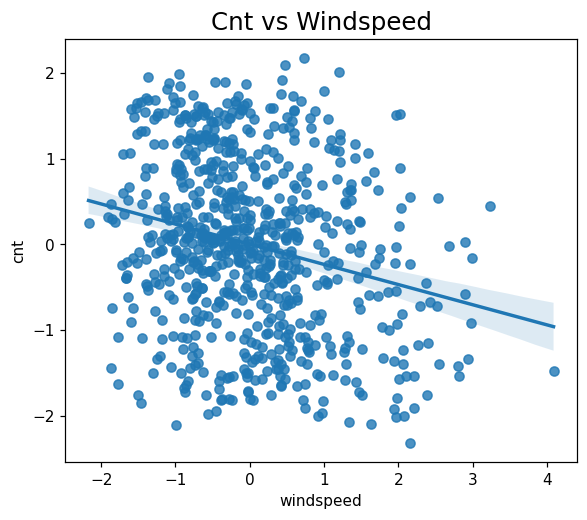

In [501]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=df,y="cnt",x="windspeed")
plt.show()

#### Observation 
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

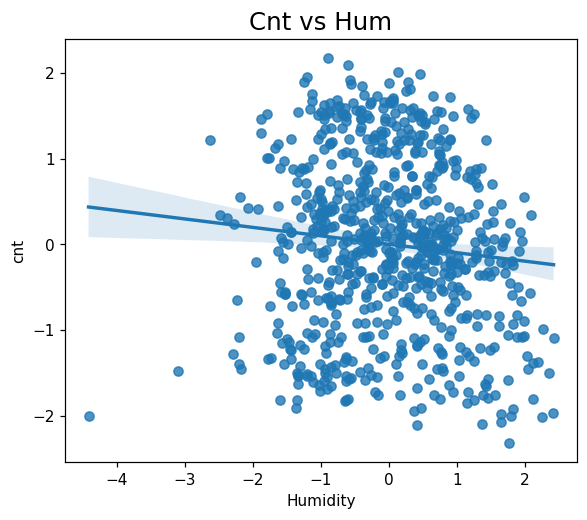

In [502]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### Observation 
- Hum values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

### Step 5 : Dummy variables : Data Preparation for model 

In [503]:
# Dummy variable creation for month, weekday, weathersit and season variables.
# Dropping the first columns as (p-1) dummies can explain p categories.
# In weathersit first column was not dropped so as to not lose the info about severe weather situation.

df = pd.get_dummies(data=df,columns=["season","mnth","weekday"],drop_first=True)
df = pd.get_dummies(data=df,columns=["weathersit"])

In [504]:
df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,-1.820972,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,-1.916078,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,-1.632827,True,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,-1.522732,True,False,...,False,False,False,False,False,True,False,True,False,False
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,-1.503090,True,False,...,False,False,False,False,False,False,True,True,False,False


In [424]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 31 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   yr                         730 non-null    int64  
 1   holiday                    730 non-null    int64  
 2   workingday                 730 non-null    int64  
 3   temp                       730 non-null    float64
 4   atemp                      730 non-null    float64
 5   hum                        730 non-null    float64
 6   windspeed                  730 non-null    float64
 7   cnt                        730 non-null    int64  
 8   season_spring              730 non-null    bool   
 9   season_summer              730 non-null    bool   
 10  season_winter              730 non-null    bool   
 11  mnth_aug                   730 non-null    bool   
 12  mnth_dec                   730 non-null    bool   
 13  mnth_feb                   730 non-null    bool   

In [505]:
# check the head of new dataframe

df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,-1.820972,True,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,-1.916078,True,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,-1.632827,True,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,-1.522732,True,False,...,False,False,False,False,False,True,False,True,False,False
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,-1.503090,True,False,...,False,False,False,False,False,False,True,True,False,False


### Step 6:  Model Building and Evaluation

#### Splitting the data
- Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)
- We will use train_test_split method from sklearn package for this

In [506]:
# splitting the dataframe into Train and Test

#y to contain only target variable
y=df.pop('cnt')

#X is all remainign variable also our independent variables
X=df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [507]:
#Inspect independent variables
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
0,0,0,0,-0.827613,-0.680818,1.252343,-0.387833,True,False,False,...,False,False,True,False,False,False,False,False,False,True
1,0,0,0,-0.722069,-0.741507,0.480996,0.748899,True,False,False,...,False,False,False,True,False,False,False,False,False,True
2,0,0,1,-1.635432,-1.750344,-1.338073,0.745931,True,False,False,...,False,True,False,False,False,False,False,True,False,False
3,0,0,1,-1.615560,-1.610886,-0.261577,-0.389769,True,False,False,...,False,False,False,False,False,True,False,True,False,False
4,0,0,1,-1.468226,-1.505615,-1.340294,-0.046477,True,False,False,...,False,False,False,False,False,False,True,True,False,False


In [508]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 30)
(219, 30)


#### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [509]:
# Let us scale numerical variables
num_vars = ['temp','atemp','hum','windspeed']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

In [510]:
#Inspect stats fro Training set after scaling
X_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [511]:
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season_spring,season_summer,season_winter,...,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Clear,weathersit_Light_snowrain,weathersit_Misty
683,1,0,1,0.327133,0.322150,0.639330,0.327101,False,False,True,...,False,False,False,False,True,False,False,False,False,True
645,1,1,0,0.403972,0.404998,0.731215,0.419004,False,False,True,...,False,True,False,False,False,False,False,False,False,True
163,0,0,1,0.717562,0.685963,0.509660,0.708724,False,True,False,...,False,True,False,False,False,False,False,True,False,False
360,0,0,1,0.331287,0.326273,0.785745,0.415925,True,False,False,...,False,False,False,False,False,True,False,False,False,True
640,1,0,1,0.745598,0.682653,0.817947,0.110593,False,False,True,...,False,False,False,False,False,False,True,False,False,True


#### Step 7 : Building a model using RFE and Automated approach


#### Use RFE to eliminate some columns

In [512]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [513]:
#Cut down number of features to 15 using automated approach
rfe = RFE(estimator=lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [514]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 3),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 12),
 ('season_winter', True, 1),
 ('mnth_aug', False, 7),
 ('mnth_dec', True, 1),
 ('mnth_feb', False, 9),
 ('mnth_jan', False, 15),
 ('mnth_july', True, 1),
 ('mnth_june', False, 16),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', True, 1),
 ('mnth_oct', False, 6),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 11),
 ('weekday_sat', True, 1),
 ('weekday_sun', False, 10),
 ('weekday_thu', False, 14),
 ('weekday_tue', False, 8),
 ('weekday_wed', False, 13),
 ('weathersit_Clear', True, 1),
 ('weathersit_Light_snowrain', True, 1),
 ('weathersit_Misty', False, 4)]

#### Manual elimination of columns

##### Function to build a model using statsmodel api

In [515]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
from statsmodels.stats.outliers_influence import variance_inflation_factor

def preprocess_data(X_train, cols):
    df = X_train[cols].copy()
    
    # Convert boolean columns to integers
    for col in df.columns:
        if df[col].dtype == 'bool':
            df[col] = df[col].astype(int)
    
    # Convert object columns to numeric if any
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Ensure all data is in float format
    df = df.astype(float)
    
    return df

def build_model(cols):
    X_train_sm = sm.add_constant(preprocess_data(X_train, cols))
    lm = sm.OLS(y_train, X_train_sm).fit()
    print(lm.summary())
    return lm



##### Function to calculate VIFs and print them

In [516]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = preprocess_data(X_train, cols)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    print(vif.sort_values(by='VIF', ascending=False))

In [517]:
#Print Columns selected by RFE. We will start with these columns for manual elimination
X_train.columns[rfe.support_]

Index(['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Light_snowrain'],
      dtype='object')

In [518]:
# Features not selected by RFE
X_train.columns[~rfe.support_]

Index(['holiday', 'workingday', 'season_summer', 'mnth_aug', 'mnth_feb',
       'mnth_jan', 'mnth_june', 'mnth_may', 'mnth_oct', 'weekday_mon',
       'weekday_sun', 'weekday_thu', 'weekday_tue', 'weekday_wed',
       'weathersit_Misty'],
      dtype='object')

In [519]:
# Taking 15 columns supported by RFE for regression
X_train_rfe = X_train[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Light_snowrain']]

In [520]:
X_train_rfe.shape

(511, 15)

### Step 8 : Build Model

#### Model 1 - Start with all variables selected by RFE

In [521]:
#Selected columns for Model 1 - all columns selected by RFE
cols = ['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Light_snowrain']

build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.72e-185
Time:                        12:25:30   Log-Likelihood:                -259.49
No. Observations:                 511   AIC:                             551.0
Df Residuals:                     495   BIC:                             618.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

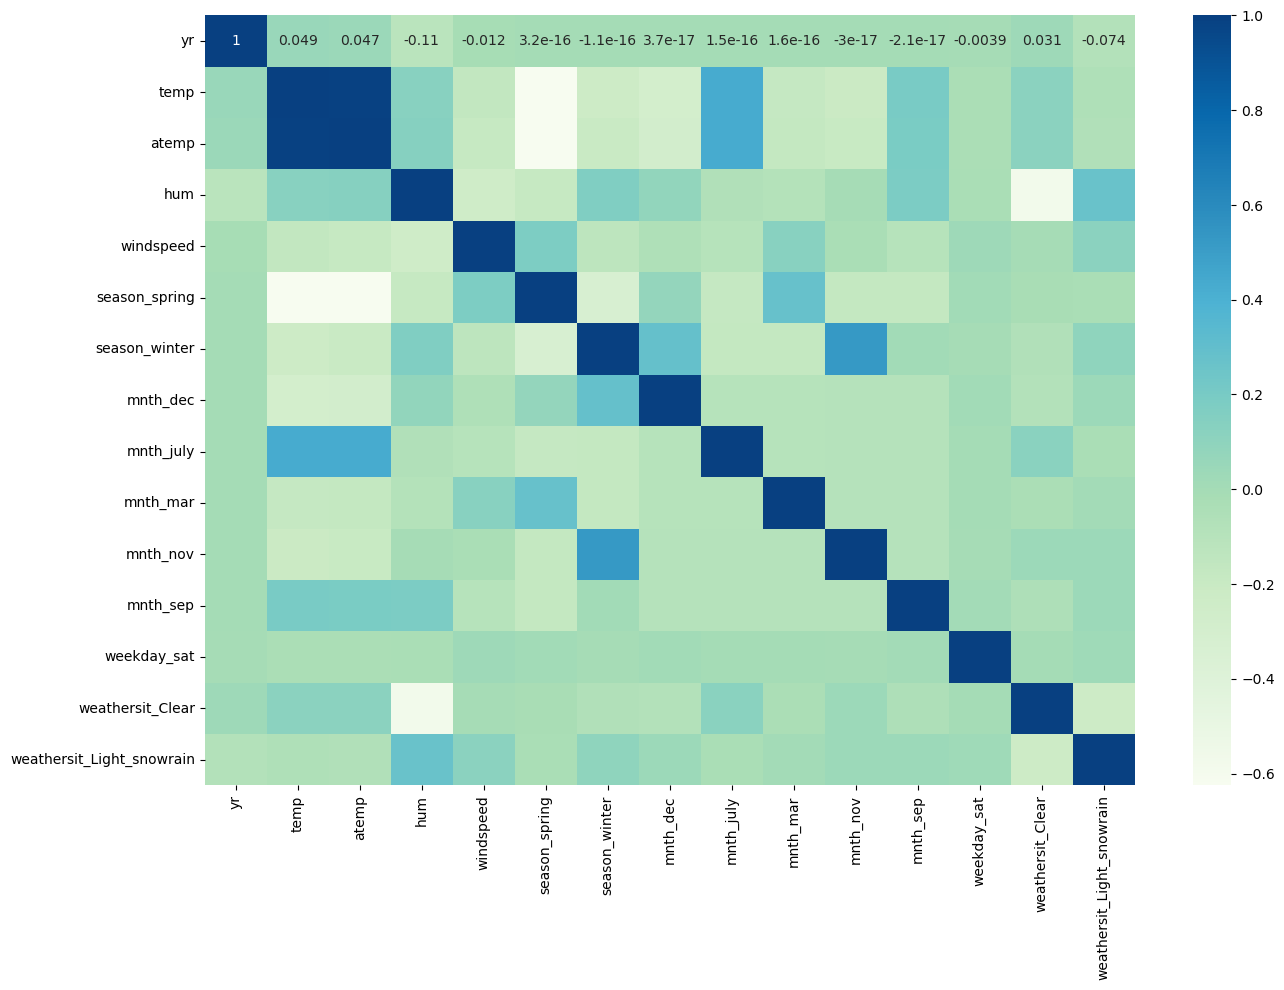

In [522]:
# Checking correlation of features selected by RFE with target column. 
# Also to check impact of different features on target.
plt.figure(figsize = (15,10))
sns.heatmap(df[['yr', 'temp', 'atemp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_dec', 'mnth_july', 'mnth_mar', 'mnth_nov',
       'mnth_sep', 'weekday_sat', 'weathersit_Clear',
       'weathersit_Light_snowrain']].corr(), cmap='GnBu', annot=True)
plt.show()

#### Model 2


In [523]:
# Dropping the variable mnth_jan as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
       'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          3.59e-184
Time:                        12:25:37   Log-Likelihood:                -264.11
No. Observations:                 511   AIC:                             558.2
Df Residuals:                     496   BIC:                             621.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 3
All the columns have p-value > .05 so checking VIFs

In [524]:
# Dropping the variable hum as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
          'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.46e-181
Time:                        12:25:40   Log-Likelihood:                -273.05
No. Observations:                 511   AIC:                             574.1
Df Residuals:                     497   BIC:                             633.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Module 4

In [525]:
# Dropping the variable holiday as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_july', 'mnth_sep', 'weekday_sat',
        'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          4.56e-182
Time:                        12:25:44   Log-Likelihood:                -274.62
No. Observations:                 511   AIC:                             575.2
Df Residuals:                     498   BIC:                             630.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 5

In [526]:
# Dropping the variable mnth_jul as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'temp', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
        'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.57e-182
Time:                        12:25:48   Log-Likelihood:                -276.31
No. Observations:                 511   AIC:                             576.6
Df Residuals:                     499   BIC:                             627.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 6

In [527]:
# Dropping the variable temp as it has negative coefficient and is insignificant as it has high p-value
cols = ['yr', 'workingday', 'windspeed', 'season_spring',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
       'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          1.84e-150
Time:                        12:25:51   Log-Likelihood:                -354.93
No. Observations:                 511   AIC:                             731.9
Df Residuals:                     500   BIC:                             778.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 7

In [528]:
## Trying to replace July with spring as both were highly correlated

cols = ['yr', 'workingday', 'windspeed', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
         'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Wed, 28 Aug 2024   Prob (F-statistic):           3.93e-97
Time:                        12:25:55   Log-Likelihood:                -481.31
No. Observations:                 511   AIC:                             984.6
Df Residuals:                     500   BIC:                             1031.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 8

In [529]:
# Removing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr', 'workingday', 'season_spring', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sat',
         'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          5.90e-146
Time:                        12:25:58   Log-Likelihood:                -365.58
No. Observations:                 511   AIC:                             753.2
Df Residuals:                     500   BIC:                             799.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 9

In [530]:
# using the weekend "Sunday" which was dropped during RFE instead of Saturday.

cols = ['yr', 'workingday', 'season_spring', 'mnth_july',
       'season_summer', 'season_winter', 'mnth_sep', 'weekday_sun',
        'weathersit_Clear', 'weathersit_Light_snowrain']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          6.32e-145
Time:                        12:26:02   Log-Likelihood:                -368.02
No. Observations:                 511   AIC:                             758.0
Df Residuals:                     500   BIC:                             804.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Model 10

In [531]:
# adding temp and removed 'season_summer' and 'workingday'
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
        'weathersit_Clear', 'weathersit_Light_snowrain', 'temp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.33e-179
Time:                        12:26:05   Log-Likelihood:                -289.51
No. Observations:                 511   AIC:                             599.0
Df Residuals:                     501   BIC:                             641.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

#### Observation
- Here VIF seems to be almost accepted. p-value for all the features is almost 0.0 and R2 is 0.821
- Let us select Model 10 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables.
- Difference between R-squared and Adjusted R-squared values for this model is very less, which also means that there are no additional parameters that can be removed from this model.

In [532]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1

In [533]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
        'weathersit_Clear', 'weathersit_Light_snowrain', 'temp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

-1.7181504765522055 [ 1.03473461 -0.60481573 -0.24959803  0.2557357   0.24965334 -0.17358562
  0.34392391 -0.84765169  2.02499812]


### Step 9 : Model Evaluation
#### Residual Analysis

In [534]:
y_train_pred = lr.predict(X_train[cols])

In [535]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.distplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

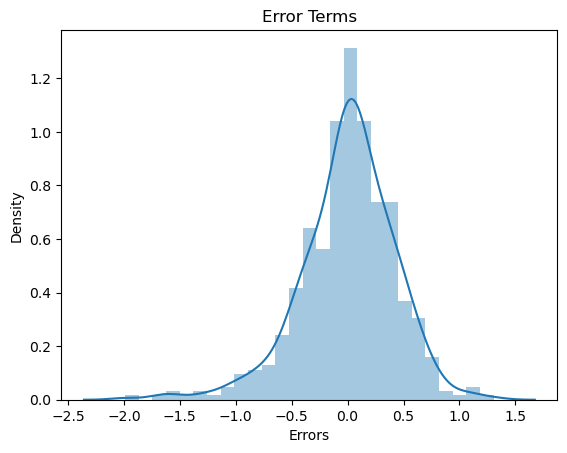

In [536]:
plot_res_dist(y_train, y_train_pred)

#### Observation
- Errors are normally distribured here with mean 0

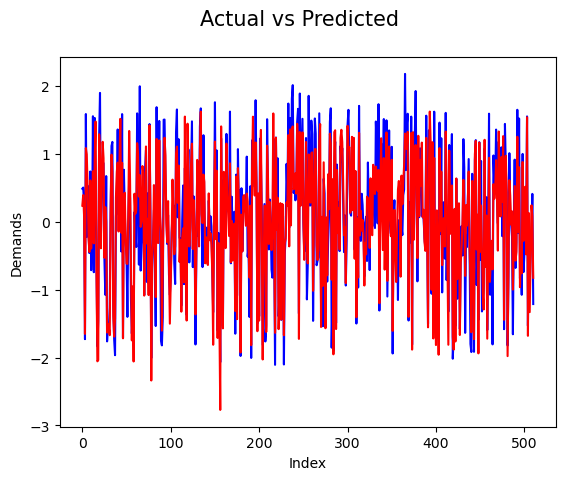

In [537]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Observation 
- Actual and Predicted result following almost the same pattern

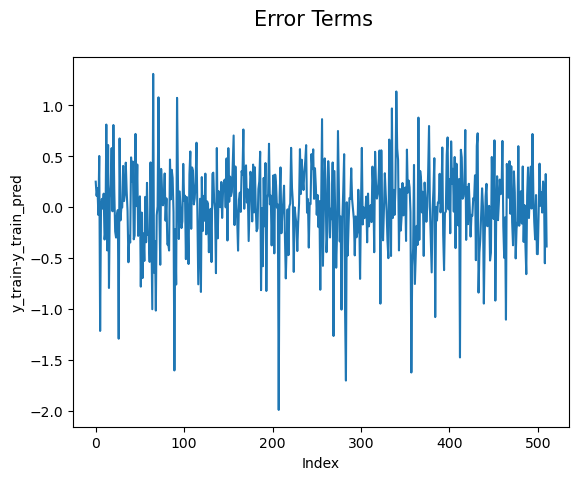

In [538]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Observation 
- The error terms are independent of each other

In [539]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8185359364498817

Observation : R2 Same as we obtained for our final model

#### Linearity Check

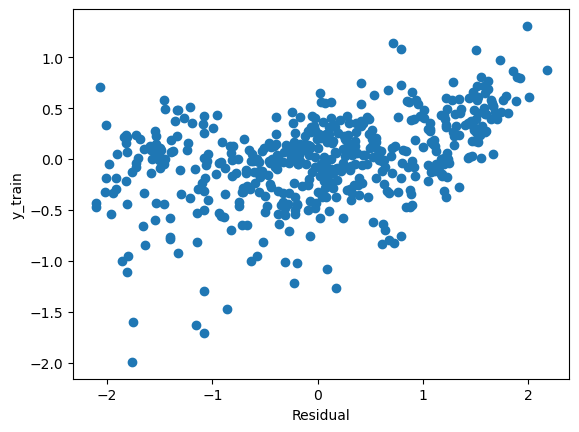

In [540]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()


 #### Predict values for test data set

In [541]:
#Scale variables in X_test
num_vars = ['temp','atemp','hum','windspeed']

#Test data to be transformed only, no fitting
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [542]:
#Columns from our final model
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
        'weathersit_Clear', 'weathersit_Light_snowrain', 'temp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

#### R-Squared value for test predictions

In [543]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8159036088393239

#### Observation
 - R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

#### Homoscedacity

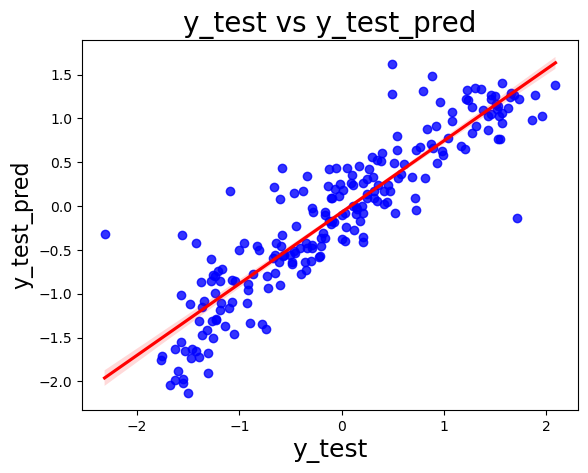

In [544]:

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

#### Observation 
- We can observe that variance of the residuals (error terms) is constant across predictions. i.e error term does not vary much as the value of the predictor variable changes.

#### Plot Test vs Predicted test values

In [545]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

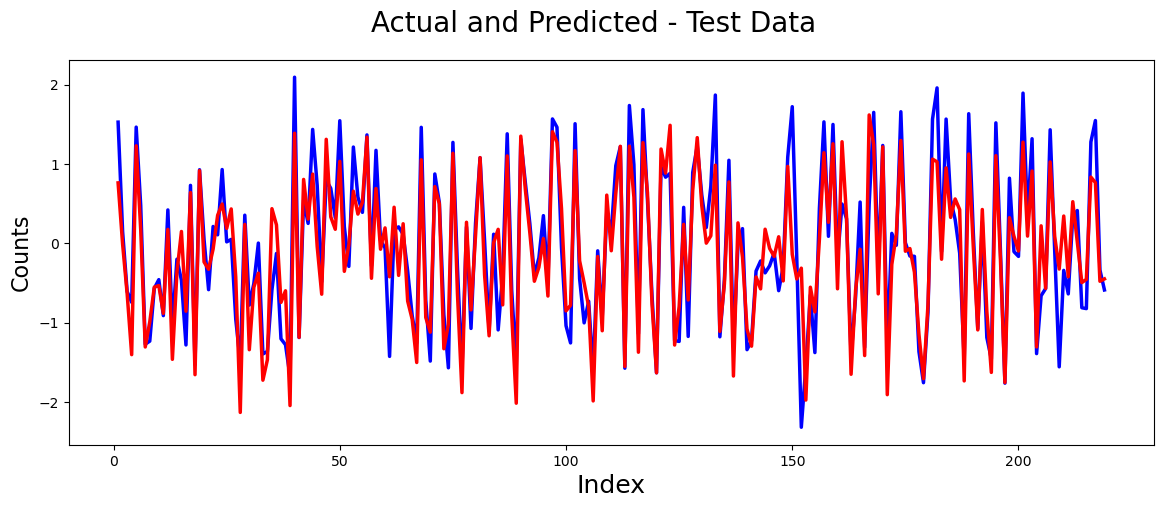

In [546]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### Observation 
- Predictions for test data is very close to actuals

#### Plot Error Terms for test data

In [547]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

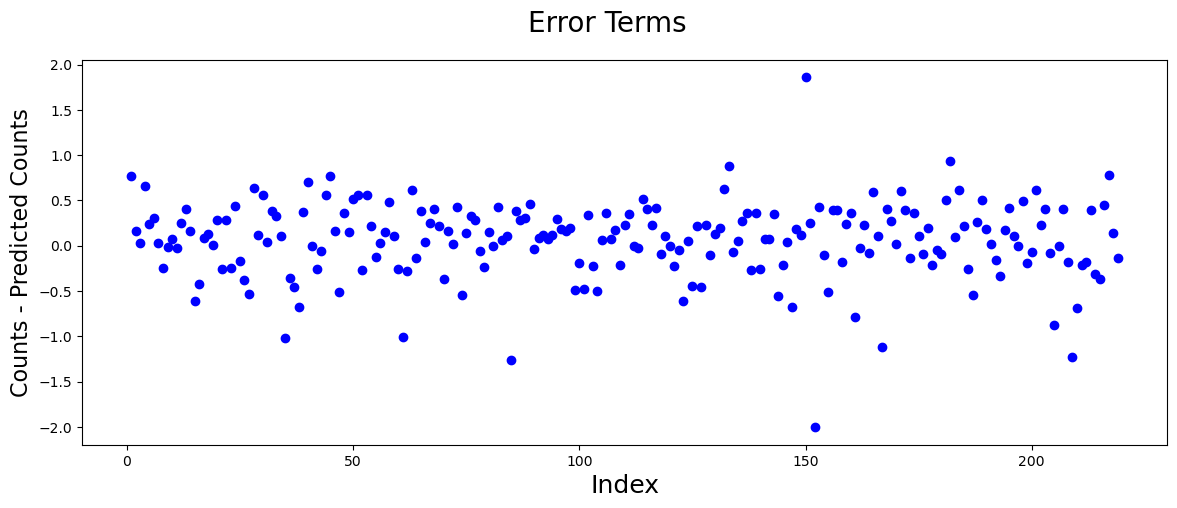

In [548]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

Observation
- As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### Step 10 : Making Predictions

In [549]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_july',
        'season_winter', 'mnth_sep', 'weekday_sun',
        'weathersit_Clear', 'weathersit_Light_snowrain', 'temp']

lm = build_model(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Wed, 28 Aug 2024   Prob (F-statistic):          2.33e-179
Time:                        12:27:00   Log-Likelihood:                -289.51
No. Observations:                 511   AIC:                             599.0
Df Residuals:                     501   BIC:                             641.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

### Summary of key inferences from results:
- **Yearly Growth**: Bike demand increases each year.
- **Seasonal Effects**: Bike demand is generally lower in spring compared to other seasons.
- **Monthly Variations**: Bike demand tends to be lower in July but higher in September.
- **Weekly Trends**: Bike demand is lower on Sundays.
- **Weather Impact**: Clear weather increases bike demand, while light snow or rain decreases it significantly.
- **Temperature**: Higher temperatures lead to more bike demand.


These results highlight that both temporal (year, month, season, weekday) and environmental (weather, temperature) factors play a crucial role in determining bike demands.
